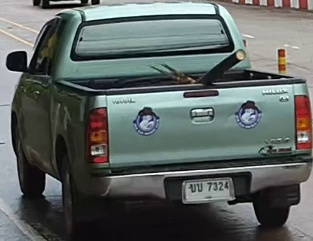

In [15]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open("../data/vehicle-type-detecion/pickup/PIC_0.jpg")

im

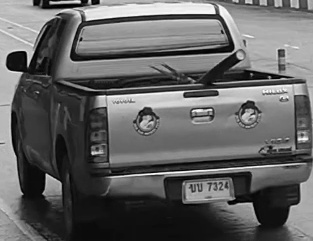

In [12]:
gray_im = im.convert("L")
gray_im

/Users/liamshepard/Desktop/Skole/semester5/data/DDP/IT3212-Image-Processing/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


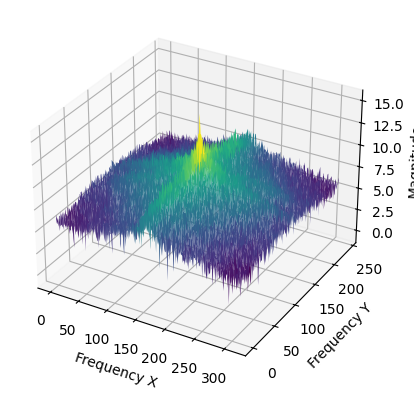

/Users/liamshepard/Desktop/Skole/semester5/data/DDP/IT3212-Image-Processing/.venv/lib/python3.13/site-packages/matplotlib/axes/_axes.py:4733: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


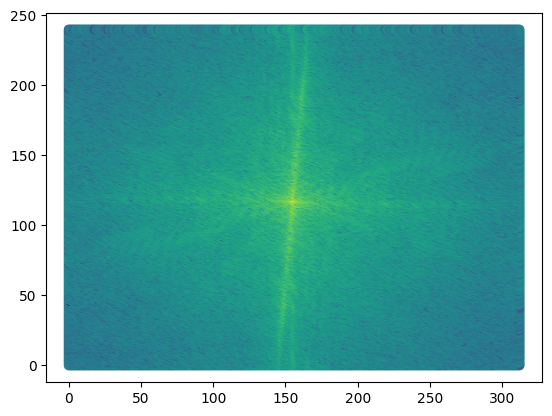

In [36]:
f_transform = np.fft.fft2(gray_im)
f_transform = np.fft.fftshift(f_transform)

f_transform_magnitude = np.abs(f_transform)
f_transform_magnitude = np.log1p(f_transform)

rows, cols = f_transform_magnitude.shape
x = np.arange(cols)
y = np.arange(rows)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, f_transform_magnitude, cmap='viridis')
ax.set_xlabel('Frequency X')
ax.set_ylabel('Frequency Y')
ax.set_zlabel('Magnitude')
plt.show()

plt.scatter(X, Y, c=f_transform_magnitude)
plt.show()



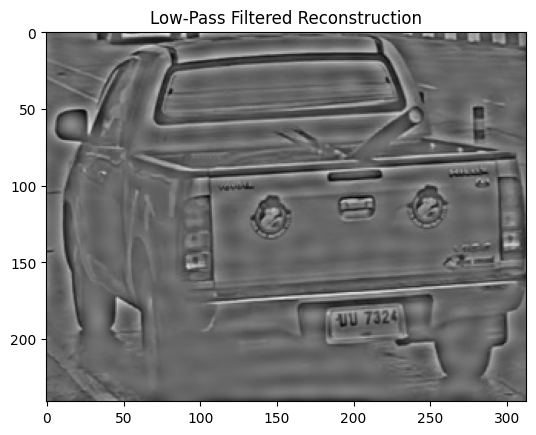

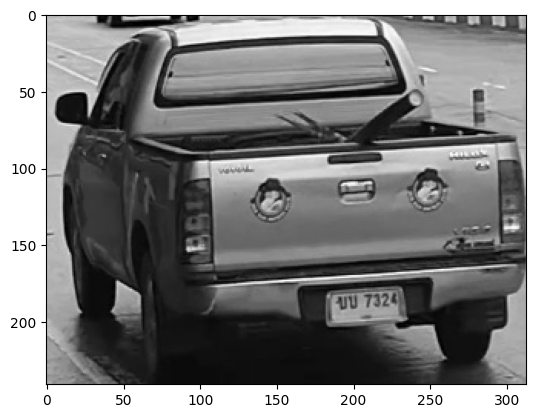

In [85]:

# 2D Fourier transform and shift
np_im = np.array(gray_im)

f_transform = np.fft.fft2(np_im)
f_shift = np.fft.fftshift(f_transform)

# create low-pass mask
rows, cols = np_im.shape
crow, ccol = rows // 2, cols // 2
low_pass_radius = 70
high_pass_radius = 15

y, x = np.ogrid[:rows, :cols]
# mask = (x - ccol)**2 + (y - crow)**2 <= low_pass_radius**2
mask = (x - ccol)**2 + (y - crow)**2 >= high_pass_radius**2

# mask = (((x - ccol)**2 + (y - crow)**2) <= low_pass_radius**2) & \
#        (((x - ccol)**2 + (y - crow)**2) >= high_pass_radius**2)


# apply mask
f_shift_filtered = f_shift * mask

# inverse shift and inverse FFT
f_ishift = np.fft.ifftshift(f_shift_filtered)
img_reconstructed = (np.fft.ifft2(f_ishift).real)

# visualization
plt.imshow(img_reconstructed, cmap='gray')
plt.title("Low-Pass Filtered Reconstruction")
plt.show()

plt.imshow(gray_im, cmap='gray')
plt.show()






Original size: 1178.64 KB
Compressed size: 58.95 KB
Compression ratio: 5.00%


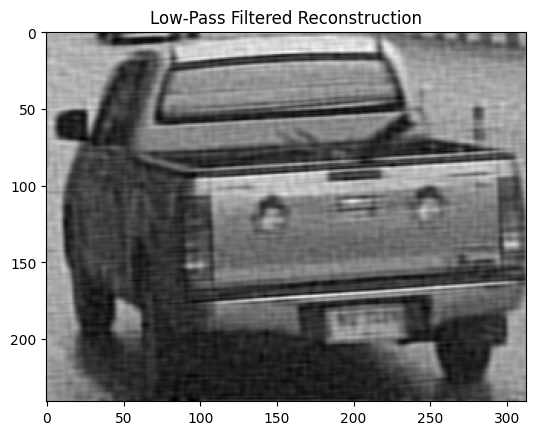

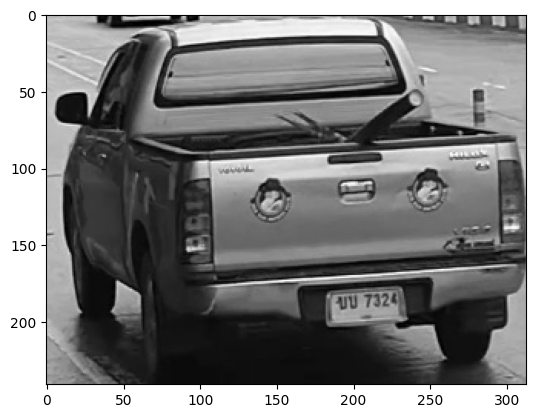

In [98]:

# 2D Fourier transform and shift
np_im = np.array(gray_im)

f_transform = np.fft.fft2(np_im)
f_shift = np.fft.fftshift(f_transform)

p = 5

magnitude = np.abs(f_shift)

flat = magnitude.flatten()
threshold = np.percentile(flat, 100 - p)  # top p%

mask = magnitude >= threshold

# apply mask
f_shift_filtered = f_shift * mask

# inverse shift and inverse FFT
f_ishift = np.fft.ifftshift(f_shift_filtered)
img_reconstructed = (np.fft.ifft2(f_ishift).real)

# compression metrics
orig_size_kb = f_shift.nbytes / 1024
kept = np.count_nonzero(mask)
comp_size_kb = kept * f_shift.itemsize / 1024
print(f"Original size: {orig_size_kb:.2f} KB")
print(f"Compressed size: {comp_size_kb:.2f} KB")
print(f"Compression ratio: {comp_size_kb / orig_size_kb:.2%}")

# visualization
plt.imshow(img_reconstructed, cmap='gray')
plt.title("Low-Pass Filtered Reconstruction")
plt.show()

plt.imshow(gray_im, cmap='gray')
plt.show()






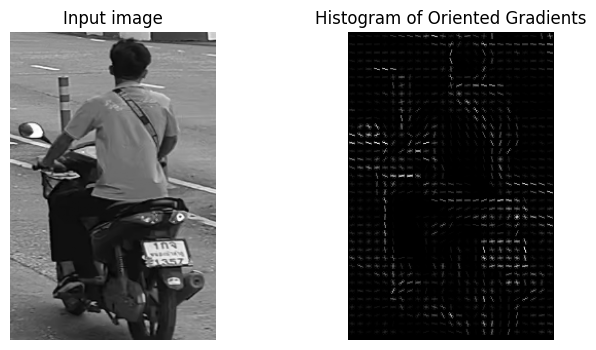

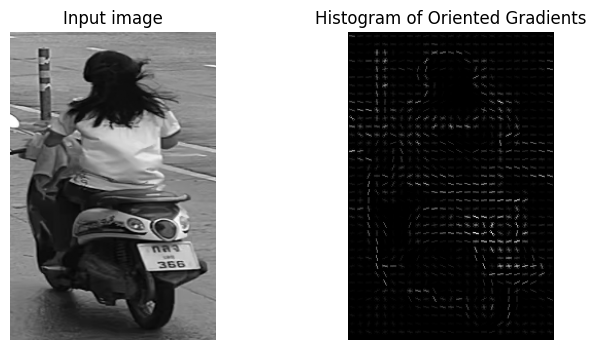

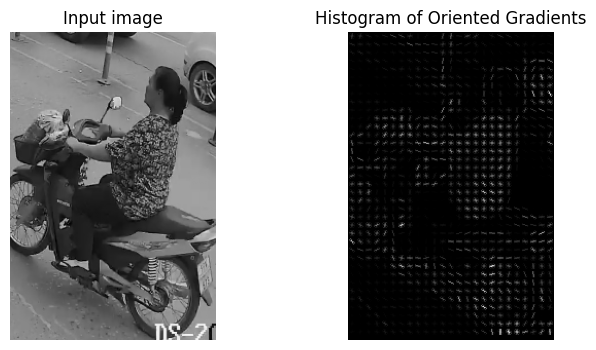

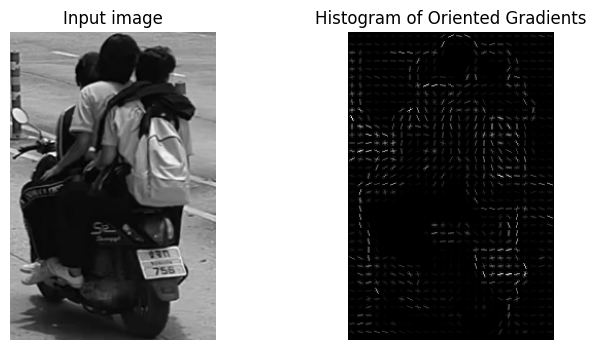

In [131]:
from skimage.feature import hog
from skimage import data, exposure
from skimage import color, transform, util


image_urls = [
    "../data/vehicle-type-detecion/motorcycle/PIC_0.jpg",
    "../data/vehicle-type-detecion/motorcycle/PIC_2.jpg",
    "../data/vehicle-type-detecion/motorcycle/PIC_3.jpg",
    "../data/vehicle-type-detecion/motorcycle/PIC_125.jpg",
]

for image_url in image_urls:
    image = np.array(Image.open(image_url).convert('L'))

    image = transform.resize(image, (300, 200))
    # image = util.img_as_float(image)

    fd, hog_image = hog(
        image,
        orientations=8,
    pixels_per_cell=(8, 8),
    cells_per_block=(1, 1),
    visualize=True,
    )

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()